In [27]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import os
import re
import string
import torch

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, log_loss, hamming_loss, f1_score, roc_auc_score, precision_score, recall_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding, Bidirectional, GlobalMaxPooling1D, Dropout
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2





In [29]:


hinglish_stopwords = ['a', 'aadi', 'aaj', 'aap', 'aapne', 'aata', 'aati', 'aaya', 'aaye', 'ab', 'abbe', 'abbey', 'abe', 'abhi', 'able',
                      'about', 'above', 'accha', 'according', 'accordingly', 'acha', 'achcha', 'across', 'actually', 'after',
                      'afterwards', 'again', 'against', 'agar', 'ain', 'aint', "ain't", 'aisa', 'aise',
                      'aisi', 'alag', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although',
                      'always', 'am', 'among', 'amongst', 'an', 'and', 'andar', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways',
                      'anywhere', 'ap', 'apan', 'apart', 'appear', 'are', 'aren', 'arent', "aren't", 'around', 'arre', 'as', 'aside', 'ask', 'asking', 'at', 'aur',
                      'avum', 'aya', 'aye', 'baad', 'baar', 'bad', 'bahut', 'bana', 'banae', 'banai', 'banao', 'banaya', 'banaye', 'banayi', 'banda', 'bande', 'bandi',
                      'bane', 'bani', 'bas', 'bata', 'batao', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind',
                      'being', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'bhai', 'bheetar', 'bhi', 'bhitar', 'bht', 'bilkul', 'bohot', 'bol',
                      'bola', 'bole', 'boli', 'bolo', 'bolta', 'bolte', 'bolti', 'both', 'brief', 'bro', 'btw', 'but', 'by', 'came', 'can', 'cannot', 'cant', "can't",
                      'cause', 'causes', 'certain', 'certainly', 'chahiye', 'chaiye', 'chal', 'chalega', 'chhaiye', 'clearly', "c'mon", 'com', 'come', 'comes', 'could',
                      'couldn', 'couldnt', "couldn't", 'd', 'dekh', 'dekha', 'dekhe', 'dekhi', 'dekho', 'dhang', 'did', 'didn', 'didnt', "didn't", 'does', 'doesn',
                      'doesnt', "doesn't", 'doing', 'done',  'dont', "don't",  'down', 'downwards', 'dude',  'during', 'dusre', 'dusri', 'dvaara', 'dvara', 'dwaara',
                      'dwara', 'each', 'edu', 'eg', 'eight', 'either', 'ek', 'else', 'elsewhere', 'enough', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone',
                      'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'few', 'fifth', 'fir', 'first', 'five', 'followed', 'following', 'follows',
                      'for', 'forth', 'four', 'from', 'further', 'furthermore', 'get', 'gets', 'getting', 'ghar', 'given', 'gives', 'go', 'goes', 'going', 'gone',
                      'good', 'got', 'gotten', 'greetings', 'haan', 'had', 'hadd', 'hadn', 'hadnt', "hadn't", 'hain', 'hamara', 'hamare', 'hamari', 'hamne',
                      'han', 'happens', 'har', 'hardly', 'has', 'hasn', 'hasnt', "hasn't", 'have', 'haven', 'havent', "haven't", 'having', 'he', 'hello',
                      'help', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', "here's", 'hereupon', 'hers', 'herself', "he's", 'hi', 'him', 'himself', 'his',
                      'hither', 'hm', 'hmm', 'ho', 'hoga', 'hoge', 'hogi', 'hona', 'honaa', 'hone', 'honge', 'hongi', 'honi', 'hopefully', 'hota', 'hotaa', 'hote', 'hoti',
                      'how', 'howbeit', 'however', 'hoyenge', 'hoyengi', 'hu', 'hua', 'hue', 'huh', 'hui', 'hum', 'humein', 'humne', 'hun', 'huye', 'huyi', 'i',
                      "i'd", 'idk', 'ie', 'if', "i'll", "i'm", 'imo', 'in', 'inasmuch', 'inc', 'inhe', 'inhi', 'inho', 'inka', 'inkaa', 'inke', 'inki', 'inn', 'inner',
                      'inse', 'insofar', 'into', 'inward', 'is', 'ise', 'isi', 'iska', 'iskaa', 'iske', 'iski', 'isme', 'isn', 'isne', 'isnt', "isn't", 'iss',
                      'isse', 'issi', 'isski', 'it', "it'd", "it'll", 'itna', 'itne', 'itni', 'itno', 'its', "it's", 'itself', 'ityaadi', 'ityadi', "i've", 'ja',
                      'jaa', 'jab', 'jabh', 'jaha', 'jahaan', 'jahan', 'jaisa', 'jaise', 'jaisi', 'jata', 'jayega', 'jidhar', 'jin', 'jinhe', 'jinhi', 'jinho', 'jinhone',
                      'jinka', 'jinke', 'jinki', 'jinn', 'jis', 'jise', 'jiska', 'jiske', 'jiski', 'jisme', 'jiss', 'jisse', 'jitna', 'jitne', 'jitni', 'jo', 'just', 'jyaada',
                      'jyada', 'k', 'ka', 'kaafi', 'kab', 'kabhi', 'kafi', 'kaha', 'kahaa', 'kahaan', 'kahan', 'kahi', 'kahin', 'kahte', 'kaisa', 'kaise', 'kaisi',
                      'kal', 'kam', 'kar', 'kara', 'kare', 'karega', 'karegi', 'karen', 'karenge', 'kari', 'karke', 'karna', 'karne', 'karni', 'karo', 'karta', 'karte',
                      'karti', 'karu', 'karun', 'karunga', 'karungi', 'kaun', 'kaunsa', 'kayi', 'kch', 'ke', 'keep', 'keeps', 'keh', 'kehte', 'kept', 'khud', 'ki',
                      'kin', 'kine', 'kinhe', 'kinho', 'kinka', 'kinke', 'kinki', 'kinko', 'kinn', 'kino', 'kis', 'kise', 'kisi', 'kiska', 'kiske', 'kiski', 'kisko',
                      'kisliye', 'kisne', 'kitna', 'kitne', 'kitni', 'kitno', 'kiya', 'kiye', 'know', 'known', 'knows', 'ko', 'koi', 'kon', 'konsa', 'koyi', 'krna',
                      'krne', 'kuch', 'kuchch', 'kuchh', 'kul', 'kull', 'kya', 'kyaa', 'kyu', 'kyuki', 'kyun', 'kyunki', 'lagta', 'lagte', 'lagti', 'last', 'lately', 'later',
                      'le', 'least', 'lekar', 'lekin', 'less', 'lest', 'let', "let's", 'li', 'like', 'liked', 'likely', 'little', 'liya', 'liye', 'll', 'lo', 'log',
                      'logon', 'lol', 'look', 'looking', 'looks', 'ltd', 'lunga', 'm', 'maan', 'maana', 'maane', 'maani', 'maano', 'magar', 'mai', 'main', 'maine', 'mainly',
                      'mana', 'mane', 'mani', 'mano', 'many', 'mat', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'mein', 'mera', 'mere', 'merely', 'meri', 'might', 'mightn', 
                      'mightnt', "mightn't", 'mil', 'mjhe', 'more', 'moreover', 'most', 'mostly', 'much', 'mujhe', 'must', 'mustn', 'mustnt', "mustn't", 'my', 'myself',
                      'na', 'naa', 'naah', 'nahi', 'nahin', 'nai', 'name', 'namely', 'nd', 'ne', 'near', 'nearly', 'necessary', 'neeche', 'need', 'needn', 'neednt',
                      "needn't", 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nhi', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nope', 'nor',
                      'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one',
                      'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own',
                      'par', 'pata', 'pe', 'pehla', 'pehle', 'pehli', 'people', 'per', 'perhaps', 'phla', 'phle', 'phli', 'placed', 'please', 'plus', 'poora',
                      'poori', 'provides', 'pura', 'puri', 'q', 'que', 'quite', 'raha', 'rahaa', 'rahe', 'rahi', 'rakh', 'rakha', 'rakhe', 'rakhen', 'rakhi',
                      'rakho', 'rather', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'rehte', 'rha', 'rhaa', 'rhe', 'rhi', 'ri', 'right',
                      's', 'sa', 'saara', 'saare', 'saath', 'sab', 'sabhi', 'sabse', 'sahi', 'said', 'sakta', 'saktaa', 'sakte', 'sakti', 'same', 'sang', 'sara',
                      'sath', 'saw', 'say', 'saying', 'says', 'se', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self',
                      'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'shan', 'shant', "shan't", 'she', "she's", 'should',
                      'shouldn', 'shouldnt', "shouldn't", "should've", 'si', 'since', 'six', 'so', 'soch', 'some', 'somebody', 'somehow', 'someone', 'something',
                      'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'still', 'sub', 'such', 'sup', 'sure', 't', 'tab', 'tabh', 'tak', 'take', 'taken',
                      'tarah', 'teen', 'teeno', 'teesra', 'teesre', 'teesri', 'tell', 'tends', 'tera', 'tere', 'teri', 'th', 'tha', 'than', 'thank', 'thanks',
                      'thanx', 'that', "that'll", 'thats', "that's", 'the', 'theek', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
                      'thereafter', 'thereby', 'therefore', 'therein', 'theres', "there's", 'thereupon', 'these', 'they', "they'd", "they'll", "they're",
                      "they've", 'thi', 'thik', 'thing', 'think', 'thinking', 'third', 'this', 'tho', 'thoda', 'thodi', 'thorough', 'thoroughly', 'those',
                      'though', 'thought', 'three', 'through', 'throughout', 'thru', 'thus', 'tjhe', 'to', 'together', 'toh', 'too', 'took', 'toward',
                      'towards', 'tried', 'tries', 'true', 'truly', 'try', 'trying', 'tu', 'tujhe', 'tum', 'tumhara', 'tumhare', 'tumhari', 'tune', 'twice',
                      'two', 'um', 'umm', 'un', 'under', 'unhe', 'unhi', 'unho', 'unhone', 'unka', 'unkaa', 'unke', 'unki', 'unko', 'unless', 'unlikely',
                      'unn', 'unse', 'until', 'unto', 'up', 'upar', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'usi', 'using', 'uska', 'uske', 'usne',
                      'uss', 'usse', 'ussi', 'usually', 'vaala', 'vaale', 'vaali', 'vahaan', 'vahan', 'vahi', 'vahin', 'vaisa', 'vaise', 'vaisi', 'vala',
                      'vale', 'vali', 'various', 've', 'very', 'via', 'viz', 'vo', 'waala', 'waale', 'waali', 'wagaira', 'wagairah', 'wagerah', 'waha',
                      'wahaan', 'wahan', 'wahi', 'wahin', 'waisa', 'waise', 'waisi', 'wala', 'wale', 'wali', 'want', 'wants', 'was', 'wasn', 'wasnt', "wasn't", 
                      'way', 'we', "we'd", 'well', "we'll", 'went', 'were', "we're", 'weren', 'werent', "weren't", "we've", 'what', 'whatever', "what's", 'when',
                      'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', "where's", 'whereupon', 'wherever', 'whether', 'which',
                      'while', 'who', 'whoever', 'whole', 'whom', "who's", 'whose', 'why', 'will', 'willing', 'with', 'within', 'without', 'wo', 'woh',
                      'wohi', 'won', 'wont', "won't", 'would', 'wouldn', 'wouldnt', "wouldn't", 'y', 'ya', 'yadi', 'yah', 'yaha', 'yahaan', 'yahan',
                      'yahi', 'yahin', 'ye',
                      'yeah', 'yeh', 'yehi', 'yes', 'yet', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've", 'yup',
                      'lie','ta', 'te', 'ti','tu', 'na', 'ne', 'ni',
                      'nga', 'nge', 'ngi', 'ya', 'ye', 'yi', 'a','ji'
                      'e', 'i', 'un', 'en', 'in', 'ega', 'egi', 'enge',
                      'ega', 'egi', 'enge', 'ata', 'ate', 'ati', 'ata',
                      'ate', 'ati','rt','mem','aura','ab', 'aur', 'is','bhai','bro',
                      'iska', 'iski', 'iske', 'isliye', 'isi', 'in','isa', 'inka',
                      'inki', 'inke', 'inko', 'inheen', 'inhonne', 'is', 'un',
                      'unka', 'unki', 'unke', 'unko', 'unheen', 'unhonne', 'us',
                      'uska', 'uski', 'uske', 'usko', 'usi', 'ek', 'kai', 'karna',
                      'kisi', 'kise', 'koi', 'kuch', 'kaise','karate','eka' ,'jab', 'jahan', 'jin','rah','raha'
                      'jinka', 'jinki', 'jinke', 'jinko', 'jinhen', 'jinhonne', 'jis',
                      'jiska', 'jiski', 'jiske', 'jisko', 'jise', 'jaise', 'jo', 'tak',
                      'tab', 'tarah', 'tha', 'thi', 'the', 'na', 'nahin', 'na', 'par',
                      'parantu', 'pahle', 'poora', 'poori', 'pe', 'phir','para','' ,'bani', 'bahut',
                      'bahi', 'buri', 'bhi', 'bhinna', 'magar', 'mano', 'matra', 'mein',
                      'yadi', 'yah', 'yahi', 'ya', 'rakhen', 'raha', 'rahi', 'rahe', 'le',
                      'lekin', 'liye', 'liya', 'liye', 'vgairah', 'vah', 'vahan', 'vahin',
                      'vale', 'vishay', 'sang', 'sakta', 'sakte', 'sakti', 'sabhi', 'sarikhe',
                      'se', 'so', 'hari', 'ha', 'hai', 'hain', 'hua', 'hui', 'hue', 'hun', 'hun',
                      'hunga', 'hungi','hindu','modi','pakistan','bjp','hunge', 'hun', 'hunga', 'hungi', 'hunge', 'ho', 'hoga',
                      'hogi', 'honge', 'hota', 'hoti', 'hote', 'hona', 'hun', 'hun', 'hunga',
                      'hungi', 'hunge', 'main', 'mujhe', 'mujhko', 'mera', 'meri', 'mere', 'ham',
                      'hamen', 'hamko', 'hamara', 'hamari', 'hamare', 'tum', 'tumhe', 'tumko', 'tera',
                      'teri', 'tere', 'aap', 'aapko', 'aapka', 'aapki', 'aapke', 'vah', 'use', 'usko',
                      'uska', 'uski', 'uske', 'ye', 'ise', 'isko', 'iska', 'iski', 'iske', 'vo', 'unhe',
                      'unko', 'unka', 'unki', 'unke', 'abe', 'bhai','wala',
]
data_list=hinglish_stopwords


In [31]:
stopwords_set = set(data_list)
def preprocess_comment(text):

    # Convert to string
    text = str(text)
    
    # Lowercase the text
    text = text.lower()
    
    # Remove single character words
    text = re.sub(r'\b\w\b', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove consecutive whitespaces
    text = re.sub(r'\s+', ' ', text)
  
    # Remove consecutive letters appearing more than twice
    text = re.sub(r'(\w)\1{2,}', r'\1', text)

    # Tokenize the tweet
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_set]
    
    # Join tokens back into text
    preprocessed_tweet = ' '.join(filtered_tokens)
    
    return preprocessed_tweet

In [33]:
df = pd.read_csv('preprocessed_Toxic_dataset.csv')

df = df.drop_duplicates(subset=['text'], keep='first')
df['text'] = df['text'].fillna('').astype(str)


In [35]:
df['rating'].value_counts()

rating
0    5608
1    2004
Name: count, dtype: int64

In [37]:
df['text'] = df['text'].apply(preprocess_comment)

In [38]:
X=df['text']
y=df['rating']

In [39]:
# Split the data into training and testing sets for each rating
X_train , X_test, y_train , y_test = train_test_split(X,y,random_state=37)

In [40]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=12000, norm='l2', ngram_range=(1, 2)) 

# Fit TF-IDF vectorizer on train and test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}
roc_aucs = {}

# Gaussian NB

In [45]:

def Gaussian_Naive_Bayes(X_train_vec, X_test_vec, model_name):
    Naive_Bayes_model = GaussianNB(var_smoothing=1e-9)
    Naive_Bayes_model.fit(X_train_vec, y_train)
    
    # Get predicted probabilities
    y_pred_proba = Naive_Bayes_model.predict_proba(X_test_vec)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Store metrics
    accuracies[model_name] = accuracy_score(y_test, y_pred_proba > 0.5)
    precisions[model_name] = precision_score(y_test, y_pred_proba > 0.5)
    recalls[model_name] = recall_score(y_test, y_pred_proba > 0.5)
    f1_scores[model_name] = f1_score(y_test, y_pred_proba > 0.5)
    roc_aucs[model_name] = roc_auc
    
    # Print metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracies[model_name]:.4f}")
    print(f"Precision: {precisions[model_name]:.4f}")
    print(f"Recall: {recalls[model_name]:.4f}")
    print(f"F1-score: {f1_scores[model_name]:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    


Metrics for Gaussian_NB:
Accuracy: 0.8108
Precision: 0.6184
Recall: 0.7642
F1-score: 0.6837
ROC AUC: 0.7960




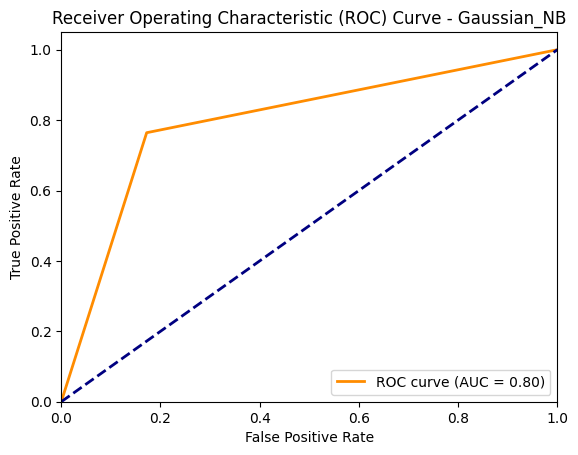

In [48]:
Gaussian_Naive_Bayes(X_train_tfidf.toarray(), X_test_tfidf.toarray(), 'Gaussian_NB')


# SVM

In [50]:
def SVM_model(X_train_vec, X_test_vec, y_train, y_test, model_name):
    
    # Calculate class weights to handle class imbalance
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    
    # Initialize SVM model with class weights and hyperparameters
    svm_model = SVC(
        kernel='linear',                  # Kernel type
        class_weight=dict(enumerate(class_weights)),  # Class weights
        C=1.0,                            # Regularization parameter
        gamma='scale',                    # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        decision_function_shape='ovr',    # One-vs-Rest strategy
        probability=True                   # Enable probability estimates (needed for ROC AUC)
    )
    
    # Train SVM model
    svm_model.fit(X_train_vec, y_train)
    
    # Get predicted probabilities
    y_pred_proba = svm_model.predict_proba(X_test_vec)[:, 1]
    
    # Get predicted labels
    y_pred = svm_model.predict(X_test_vec)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"The Metrics of {model_name} are:")
    
    # Calculate accuracy
    accuracy = (y_pred == y_test).mean()
    accuracies[model_name] = accuracy
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    precisions[model_name] = precision
    recalls[model_name] = recall
    f1_scores[model_name] = f1
    roc_aucs[model_name] = roc_auc
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

The Metrics of SVM are:
Accuracy: 0.9501
Precision: 0.9242
Recall: 0.8861
F1-score: 0.9047
ROC AUC: 0.9769




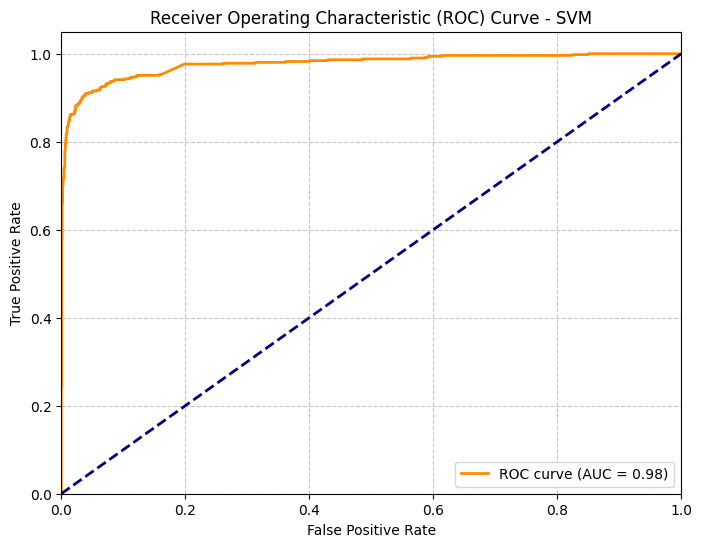

In [51]:
SVM_model(X_train_tfidf , X_test_tfidf ,y_train, y_test,'SVM')

# Logistic Regression

In [53]:


def Logistic_Regression(X_train, X_test, y_train, y_test, model_name):
    # Initialize logistic regression model
    logistic_model = LogisticRegression(max_iter=1000)
    
    # Train logistic regression model
    logistic_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = logistic_model.predict(X_test)
    
    # Get predicted probabilities for ROC curve
    y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
    
    print(f"The Metrics of {model_name} are:")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred, output_dict=True)
    precisions[model_name] = report['1']['precision']
    recalls[model_name] = report['1']['recall']
    f1_scores[model_name] = report['1']['f1-score']
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_aucs[model_name] = roc_auc
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {report['1']['precision']:.4f}")
    print(f"Recall: {report['1']['recall']:.4f}")
    print(f"F1-score: {report['1']['f1-score']:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

The Metrics of Logistic Regression are:
Accuracy: 0.9238
Precision: 0.9919
Recall: 0.7210
F1-score: 0.8350
ROC AUC: 0.9812




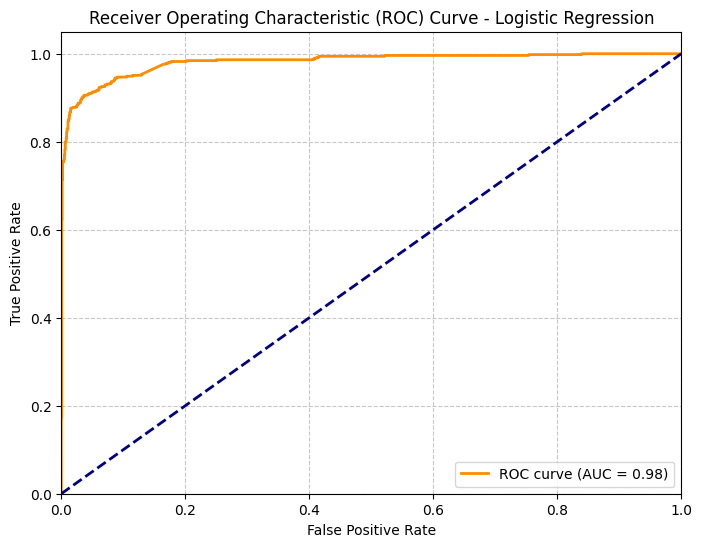

In [54]:
Logistic_Regression(X_train_tfidf , X_test_tfidf ,y_train, y_test,'Logistic Regression')

# Random Forest

In [56]:


def random_forest(X_train, X_test, model_name):
    
    # Initialize Random Forest Classifier
    rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    verbose=0)
    
    # Train Random Forest Classifier
    rf_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)
        
    # Get predicted probabilities for ROC curve
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    print(f"The Metrics of {model_name} are:")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred, output_dict=True)
    precisions[model_name] = report['1']['precision']
    recalls[model_name] = report['1']['recall']
    f1_scores[model_name] = report['1']['f1-score']
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_aucs[model_name] = roc_auc
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {report['1']['precision']:.4f}")
    print(f"Recall: {report['1']['recall']:.4f}")
    print(f"F1-score: {report['1']['f1-score']:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    


The Metrics of Random Forest are:
Accuracy: 0.8975
Precision: 0.7508
Recall: 0.9234
F1-score: 0.8282
ROC AUC: 0.9712




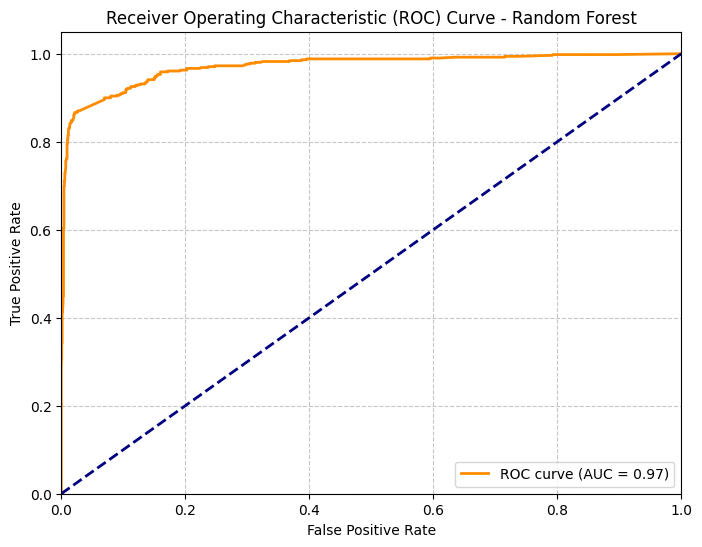

In [57]:
random_forest(X_train_tfidf, X_test_tfidf , "Random Forest")

# RNN

In [59]:
def LongShortTermNormal(X, y, model_name):
    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X_sequences = tokenizer.texts_to_sequences(X)
    
    # Pad sequences to ensure uniform length
    max_seq_length = max([len(seq) for seq in X_sequences])
    X_padded = pad_sequences(X_sequences, maxlen=max_seq_length)
    
    # Convert labels to numpy array
    y = np.array(y)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
    
    # Define the RNN model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
    model.add(LSTM(units=32))
    model.add(Dropout(0.6))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=20)
    
    # Train the model
    model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=[early_stopping])
    
    # Get predicted probabilities
    y_pred_proba = model.predict(X_test).flatten()
    
    # Get predicted labels
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    print(f"The Metrics of {model_name} are:")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred, output_dict=True)
    precisions[model_name] = report['1']['precision']
    recalls[model_name] = report['1']['recall']
    f1_scores[model_name] = report['1']['f1-score']
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_aucs[model_name] = roc_auc
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {report['1']['precision']:.4f}")
    print(f"Recall: {report['1']['recall']:.4f}")
    print(f"F1-score: {report['1']['f1-score']:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return model


Epoch 1/10


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


153/153 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.7385 - loss: 0.8403 - val_accuracy: 0.8678 - val_loss: 0.4603
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.9133 - loss: 0.3406 - val_accuracy: 0.9343 - val_loss: 0.2479
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9846 - loss: 0.1089 - val_accuracy: 0.9278 - val_loss: 0.2323
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9948 - loss: 0.0569 - val_accuracy: 0.9261 - val_loss: 0.2535
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9993 - loss: 0.0324 - val_accuracy: 0.9327 - val_loss: 0.2707
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9989 - loss: 0.0237 - val_accuracy: 0.9335 - val_loss: 0.2737
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9990 - loss: 0.0186 - val_accuracy: 0.9319 - val_loss: 0.2813
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.9992 - loss: 0.0178 - val_acc

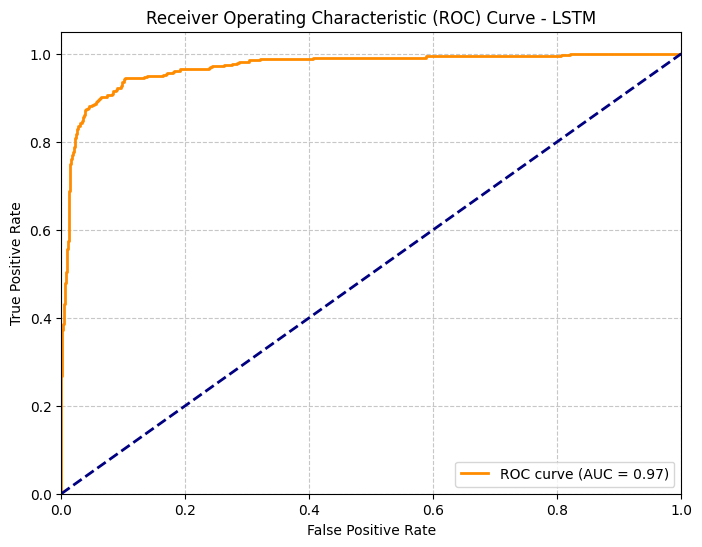

In [60]:
LSTM = LongShortTermNormal(X,y, "LSTM")

In [61]:
# Save the model weights
# LSTM.save_weights('toxic_comment_rnn_30epo.weights.h5')

# GRU

In [65]:
from tensorflow.keras.layers import Embedding, GRU, Dense , Dropout

In [66]:
def GRU_Model(X, y, model_name):
    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X_sequences = tokenizer.texts_to_sequences(X)
    
    # Pad sequences to ensure uniform length
    max_seq_length = max([len(seq) for seq in X_sequences])
    X_padded = pad_sequences(X_sequences, maxlen=max_seq_length)
    
    # Convert labels to numpy array
    y = np.array(y)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
    
    # Define the GRU model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
    model.add(GRU(units=64))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    
    # Train the model
    model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])
    
    # Get predicted probabilities
    y_pred_proba = model.predict(X_test).flatten()
    
    # Get predicted labels
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    print(f"The Metrics of {model_name} are:")
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred, output_dict=True)
    precisions[model_name] = report['1']['precision']
    recalls[model_name] = report['1']['recall']
    f1_scores[model_name] = report['1']['f1-score']
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_aucs[model_name] = roc_auc
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {report['1']['precision']:.4f}")
    print(f"Recall: {report['1']['recall']:.4f}")
    print(f"F1-score: {report['1']['f1-score']:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.7345 - loss: 0.5716 - val_accuracy: 0.9335 - val_loss: 0.1987
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.9690 - loss: 0.0972 - val_accuracy: 0.9269 - val_loss: 0.1975
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.9874 - loss: 0.0347 - val_accuracy: 0.9319 - val_loss: 0.2255
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9343 - val_loss: 0.2486
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 0.9327 - val_loss: 0.2456
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9335 - val_loss: 0.2630
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9384 - val_loss: 0.2936
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 1.0000 - loss: 4.0073e-04 -

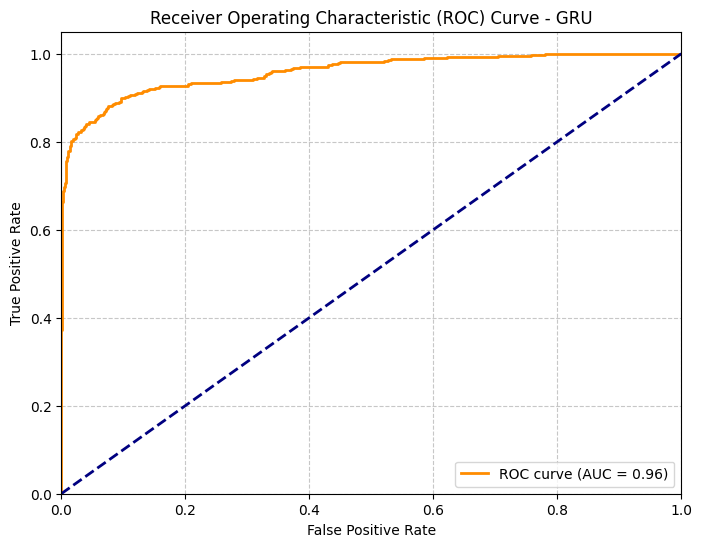

In [67]:
GRU = GRU_Model(X, y, 'GRU')

# Plotting the Metrics

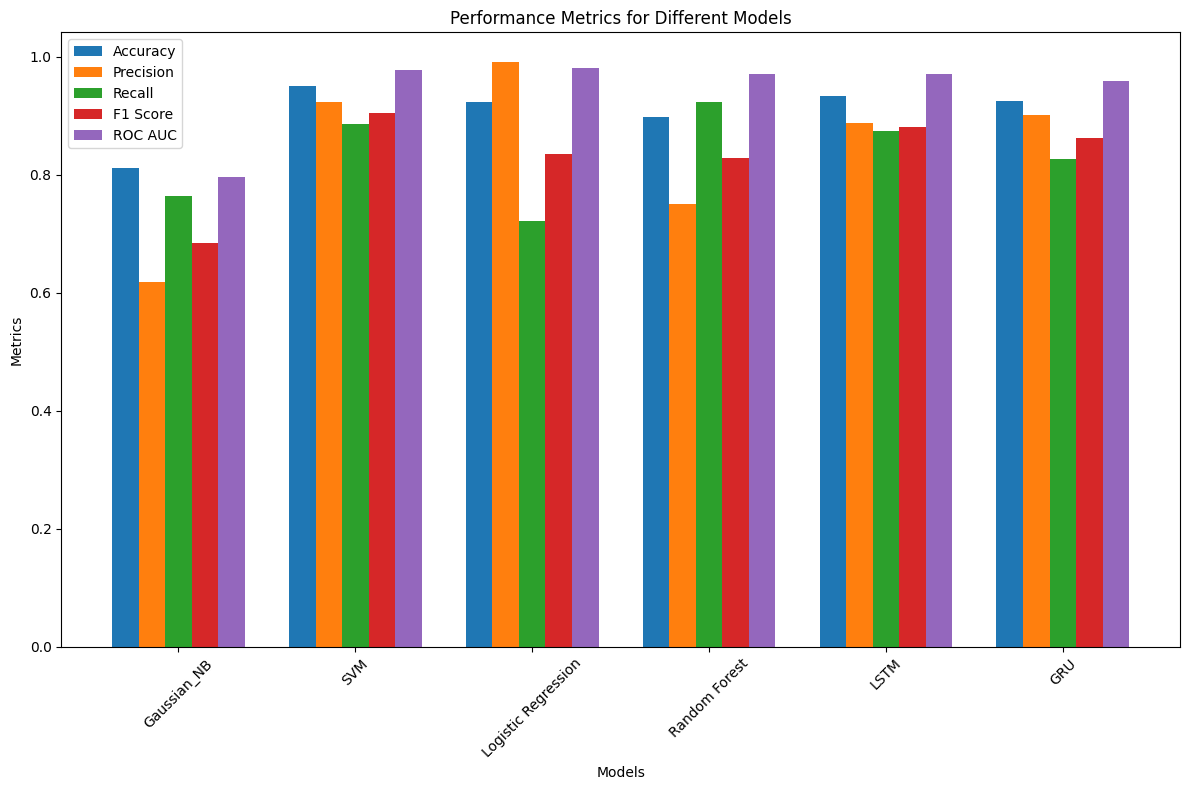

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = list(accuracies.keys())

# Metrics data
acc_values = list(accuracies.values())
prec_values = list(precisions.values())
rec_values = list(recalls.values())
f1_values = list(f1_scores.values())
roc_auc_values = list(roc_aucs.values())

# X-axis positions
x = np.arange(len(models))

# Bar width
width = 0.15

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each metric as a bar
ax.bar(x - 2 * width, acc_values, width, label='Accuracy')
ax.bar(x - width, prec_values, width, label='Precision')
ax.bar(x, rec_values, width, label='Recall')
ax.bar(x + width, f1_values, width, label='F1 Score')
ax.bar(x + 2 * width, roc_auc_values, width, label='ROC AUC')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


# Using BERT

In [60]:
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# 1. Load and preprocess the data
texts = df['text'].tolist()
labels = df['rating'].tolist()

# Split the data
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=37)



In [62]:
class ToxicCommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }




In [64]:
# 3. Set up the BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Create datasets and dataloaders
train_dataset = ToxicCommentDataset(train_texts, train_labels, tokenizer, max_length=128)
val_dataset = ToxicCommentDataset(val_texts, val_labels, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
# 4. Define the training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

def train_epoch(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0
    progress_bar = tqdm(dataloader, desc="Training", leave=False)
    for batch in progress_bar:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Update progress bar
        progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

    return total_loss / len(dataloader)

def evaluate(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []

    progress_bar = tqdm(dataloader, desc="Evaluating", leave=False)
    with torch.no_grad():
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds.cpu().tolist())
            true_labels.extend(labels.cpu().tolist())

    return accuracy_score(true_labels, predictions), classification_report(true_labels, predictions)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# 5. Train the model
num_epochs = 20
train_losses = []
val_accuracies = []

for epoch in tqdm(range(num_epochs), desc="Epochs"):
    train_loss = train_epoch(model, train_loader, optimizer, device)
    val_accuracy, val_report = evaluate(model, val_loader, device)
    
    # Store the metrics for plotting
    train_losses.append(train_loss)
    val_accuracies.append(val_accuracy)

# 6. Save the model
model.save_pretrained("./toxic_comment_bert_20epoch")
tokenizer.save_pretrained("./toxic_comment_bert_20epoch")

Training:   0%|                                                                                | 0/381 [00:00<?, ?it/s]c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(

Training: 100%|█████████████████████████████████████████████████████████| 381/381 [05:11<00:00,  1.38it/s, loss=0.0495]
                                                                                                                       
Training: 100%|█████████████████████████████████████████████████████████| 381/381 [05:10<00:00,  1.38it/s, loss=0.3647]
                                                                                                                       
Training: 100%|█████████████████████████████████████████████████████

In [ ]:
# 7. Plot the training loss and validation accuracy
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Visualize training and validation metrics
epochs = np.arange(1, num_epochs + 1)  # X-axis positions for each epoch

# Bar width
width = 0.3

# Create subplots for visualizing training loss and validation accuracy
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for training loss and validation accuracy
ax.bar(epochs - width/2, train_losses, width, label='Training Loss', color='blue')
ax.bar(epochs + width/2, val_accuracies, width, label='Validation Accuracy', color='green')

# Set labels and title
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_title('Training Loss and Validation Accuracy Over Epochs', fontsize=14)
ax.set_xticks(epochs)  # Set the epoch numbers as ticks on the x-axis
ax.legend()

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits properly
plt.tight_layout()

# Show the plot
plt.show()

In [118]:
def predict_toxicity(text, model_path="./toxic_comment_bert"):
    # Load the model and tokenizer
    model = BertForSequenceClassification.from_pretrained(model_path)
    tokenizer = BertTokenizer.from_pretrained(model_path)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Preprocess the input text
    encoded_input = tokenizer(text, 
                              truncation=True, 
                              padding=True, 
                              max_length=128, 
                              return_tensors="pt")
    
    # Move the input to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)
    
    # Make the prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        prediction = torch.argmax(probabilities, dim=-1).item()
    
    # Interpret the prediction
    if prediction == 1:
        result = "Toxic"
        probability = probabilities[0][1].item()
    else:
        result = "Not Toxic"
        probability = probabilities[0][0].item()
    
    return result, probability



In [146]:
text = input("Enter the text for Toxicity detection")
result, probability = predict_toxicity(text)
print(f"Input text: '{text}'")
print(f"Prediction: {result}")
print(f"Confidence: {probability:.4f}")



Input text: 'Raze kuch nahi aata tujhe pakistani chutiya'
Prediction: Toxic
Confidence: 0.9947

Input text: 'Have a great day! I hope you're doing well.'
Prediction: Not Toxic
Confidence: 0.9755
